# 만들어진 데이터로 일단 이것 저것 해보기

- soynlp, wordcloud, gensim 모듈을 설치해야함
- pip install soynlp
- pip install wordcloud
- pip install gensim

<br/><br/>
### 1. 데이터 로드

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('../data/naver_clova.csv', encoding='utf-8')

In [11]:
df.head()

,Unnamed: 0,title,publish_datetime,text,url
0,0,애기들이 좋아하는 ai스피커 네이버클로바,2019-03-20 23:01:00,애기들이 좋아하는 ai스피커 네이버클로바\n작년부터 tv에 #인공지능 스피커가 \n...,https://blog.naver.com/sky121400?Redirect=Log&...
1,1,네이버 클로바 스피커 1년 사용 후기,2019-03-31 19:35:00,네이버 클로바 스피커 1년 사용 후기\n네이버 클로바 1년 사용 후기를 몇 자 적어...,https://blog.naver.com/danjuck?Redirect=Log&lo...
2,2,네이버 클로바 사용법 맘스다이어리와 함께 육아정보를,2018-12-14 12:10:00,어제는 눈이 갑자기 많이 내려서 1주일에 한번 가는 문센을 가야하나 말아야하나고민이...,https://blog.naver.com/ralrapo?Redirect=Log&lo...
3,3,네이버 클로바. 나의 두 번째 Ai 스피커,2018-12-02 14:04:00,안녕하세요. 제르디난 입니다.\n올해 초 카카오 미니를 사용해보고 약간의 실망스러움...,https://blog.naver.com/yarosiku?Redirect=Log&l...
4,4,네이버 클로바 스피커 브라운 미니언 : 오히려 부모님 선물로 추천드려요!,2018-09-09 18:18:00,네이버 클로바 스피커 브라운 미니언 : 오히려 부모님 선물로 추천드려요!\n요새 정...,https://blog.naver.com/ukb0914?Redirect=Log&lo...


<br/><br/>
### 2. null 값이 있는 데이터 확인 및 제거

In [28]:
df[df['text'].isnull()]

,Unnamed: 0,title,publish_datetime,text,url
15,15,NaN,NaN,NaN,https://trend21c.tistory.com/2069
32,32,NaN,NaN,NaN,https://theuranus.tistory.com/4537
64,64,NaN,NaN,NaN,https://marketing.rakooon.com/603?category=506849
92,92,NaN,NaN,NaN,https://googolplex10.tistory.com/411
93,93,NaN,NaN,NaN,https://rdsong.com/2391
94,94,NaN,NaN,NaN,https://sajagogumi.tistory.com/145
95,95,NaN,NaN,NaN,https://its.tistory.com/2470615
96,96,NaN,NaN,NaN,https://justwalk.tistory.com/entry/%EB%84%A4%E...
97,97,NaN,NaN,NaN,https://liverex.net/5041
120,120,NaN,NaN,NaN,https://donghun.kr/2474?category=409649


In [27]:
notnull_df = df[df['text'].notnull()].copy()

<br/><br/>
### 3. 토큰화

In [33]:
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()

In [16]:
import re

In [105]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [106]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = notnull_df['text'].apply(preprocessing)

CPU times: user 114 ms, sys: 2.65 ms, total: 117 ms
Wall time: 116 ms


In [107]:
sentences

0       애기들이 좋아하는 ai스피커 네이버클로바 작년부터 tv에  인공지능 스피커가  엄청...
1       네이버 클로바 스피커  년 사용 후기 네이버 클로바  년 사용 후기를 몇 자 적어볼...
2       어제는 눈이 갑자기 많이 내려서  주일에 한번 가는 문센을 가야하나 말아야하나고민이...
3       안녕하세요  제르디난 입니다  올해 초 카카오 미니를 사용해보고 약간의 실망스러움과...
4       네이버 클로바 스피커 브라운 미니언   오히려 부모님 선물로 추천드려요  요새 정말...
5       네이버 클로바 미니언즈로 메이네 집이 스마트해졌습니다  ㅋㅋ 저희가 쓰는 인터넷이 ...
6       네이버 클로바 스피커 사용해보기 저는 유행에 둔감한 사람인 것 같습니다  아마도 나...
7       최근 구글 어시스턴트  아마존 알렉사  애플 시리  삼성전자 빅스비 등 인공지능 기...
8       꼬물 꼬물 귀요미 미니언즈가LG유플러스 네이버 클로바 스페셜에디션으로나왔어요  보기...
9       인공지능스피커 네이버 클로바맘스다이어리 천일스토리로 육아정보 들어요 육아하는 엄마들...
10      내 사랑 도라에몽이네이버 클로바 스피커로 나와서잽싸게 득템했어요 으흐흐개봉기 및 후...
11      이미 출시 된지는 조금 지나긴 했지만 이제야 만나보는 네이버클로바 미니언즈 블루투스...
12      네이버 클로바프렌즈 미니 개봉기 바야흐로 인공지능의 시대다  몇년전 떠들석했던 이세...
13      안녕하세용ㅋㅋㅋ잇님들 자취방에서 이제 티비를 신청해서얻게된 네이버 클로바 입니다  ...
14        월이라고 날씨가 너무 추운데요아들 데리고 나가서 이것저것 보여주고 싶은데 또 그...
16      미니언즈 네이버 클로바 스피커 밥 BOB  개봉기  네이버 클로바 스피커 미니언즈 ...
17      조만간 조만간 하다가 어느새 한달이 넘었습니다 한달을 쓴만큼 자세히 클로바 사용후기...
18      제가 최근에

In [108]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 1.71 s, sys: 23.7 ms, total: 1.73 s
Wall time: 1.74 s


0    [애기들이, 좋아하는, ai, 스피커, 네이버클로바, 작년부터, tv, 에, 인공지...
1    [네이버, 클로바, 스피커, 년, 사용, 후기, 네이버, 클로바, 년, 사용, 후기...
2    [어제는, 눈이, 갑자기, 많이, 내려서, 주일에, 한번, 가는, 문센을, 가야하나...
Name: text, dtype: object

<br/><br/>
### 4. 최빈단어 확인하기

In [109]:
# word2vec 모델 학습에 로그를 찍을 수 있도록 합니다.
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [111]:
# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(tokens, min_count=1)

2019-04-08 02:41:11,299 : INFO : collecting all words and their counts
2019-04-08 02:41:11,300 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-04-08 02:41:11,387 : INFO : collected 64787 word types from a corpus of 304873 raw words and 1052 sentences
2019-04-08 02:41:11,388 : INFO : Loading a fresh vocabulary
2019-04-08 02:41:11,586 : INFO : effective_min_count=1 retains 64787 unique words (100% of original 64787, drops 0)
2019-04-08 02:41:11,587 : INFO : effective_min_count=1 leaves 304873 word corpus (100% of original 304873, drops 0)
2019-04-08 02:41:11,774 : INFO : deleting the raw counts dictionary of 64787 items
2019-04-08 02:41:11,776 : INFO : sample=0.001 downsamples 12 most-common words
2019-04-08 02:41:11,777 : INFO : downsampling leaves estimated 294079 word corpus (96.5% of prior 304873)
2019-04-08 02:41:11,920 : INFO : estimated required memory for 64787 words and 100 dimensions: 84223100 bytes
2019-04-08 02:41:11,920 : INFO : resetting laye

In [112]:
# 모델 이름을 지정하고 저장한다.
model_name = '1minwords'
model.save(model_name)

2019-04-08 02:41:43,781 : INFO : saving Word2Vec object under 1minwords, separately None
2019-04-08 02:41:43,783 : INFO : not storing attribute vectors_norm
2019-04-08 02:41:43,785 : INFO : not storing attribute cum_table
2019-04-08 02:41:44,393 : INFO : saved 1minwords


In [113]:
# 단어 사전 수
len(model.wv.vocab)

64787

In [114]:
# 단어 사전에서 상위 30개만 보기
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:30]

['클로바',
 '네이버',
 '수',
 '스피커',
 '인공지능',
 'AI',
 '있는',
 '프렌즈',
 '더',
 '있습니다',
 '잘',
 '것',
 '있어요',
 '할',
 '를',
 '이',
 '미니언즈',
 '너무',
 '블루투스',
 'ㅎㅎ',
 '바로',
 '그리고',
 '라고',
 'ㅋㅋ',
 '클로바를',
 '등',
 '통해',
 '스피커를',
 '하면',
 '하고']

In [115]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vocab).most_common(20))

{'AI': <gensim.models.keyedvectors.Vocab at 0x1a2197c160>,
 'ㅎㅎ': <gensim.models.keyedvectors.Vocab at 0x1a21983eb8>,
 '것': <gensim.models.keyedvectors.Vocab at 0x1a23efff98>,
 '너무': <gensim.models.keyedvectors.Vocab at 0x1a2410db70>,
 '네이버': <gensim.models.keyedvectors.Vocab at 0x1a219698d0>,
 '더': <gensim.models.keyedvectors.Vocab at 0x1a21969dd8>,
 '를': <gensim.models.keyedvectors.Vocab at 0x1a23eff240>,
 '미니언즈': <gensim.models.keyedvectors.Vocab at 0x1a21980be0>,
 '블루투스': <gensim.models.keyedvectors.Vocab at 0x1a2197c940>,
 '수': <gensim.models.keyedvectors.Vocab at 0x1a21969208>,
 '스피커': <gensim.models.keyedvectors.Vocab at 0x1a23ab4c18>,
 '이': <gensim.models.keyedvectors.Vocab at 0x1a21999b38>,
 '인공지능': <gensim.models.keyedvectors.Vocab at 0x1a23ab4a20>,
 '있는': <gensim.models.keyedvectors.Vocab at 0x1a2196bda0>,
 '있습니다': <gensim.models.keyedvectors.Vocab at 0x1a219757f0>,
 '있어요': <gensim.models.keyedvectors.Vocab at 0x1a2197c630>,
 '잘': <gensim.models.keyedvectors.Vocab at 0x1a23e

In [116]:
# 가장 적게 등장하는 단어
min(vocab, key=vocab.get)

'애기들이'

<br/><br/>
### 5. WordCloud 확인하기

In [85]:
import platform
from matplotlib import font_manager, rc

# 그래프 그릴 때 폰트 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    font_path = "/System/Library/Fonts/AppleGothic.ttf"
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

In [101]:
stopwords_kr = []

In [102]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = stopwords_kr, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

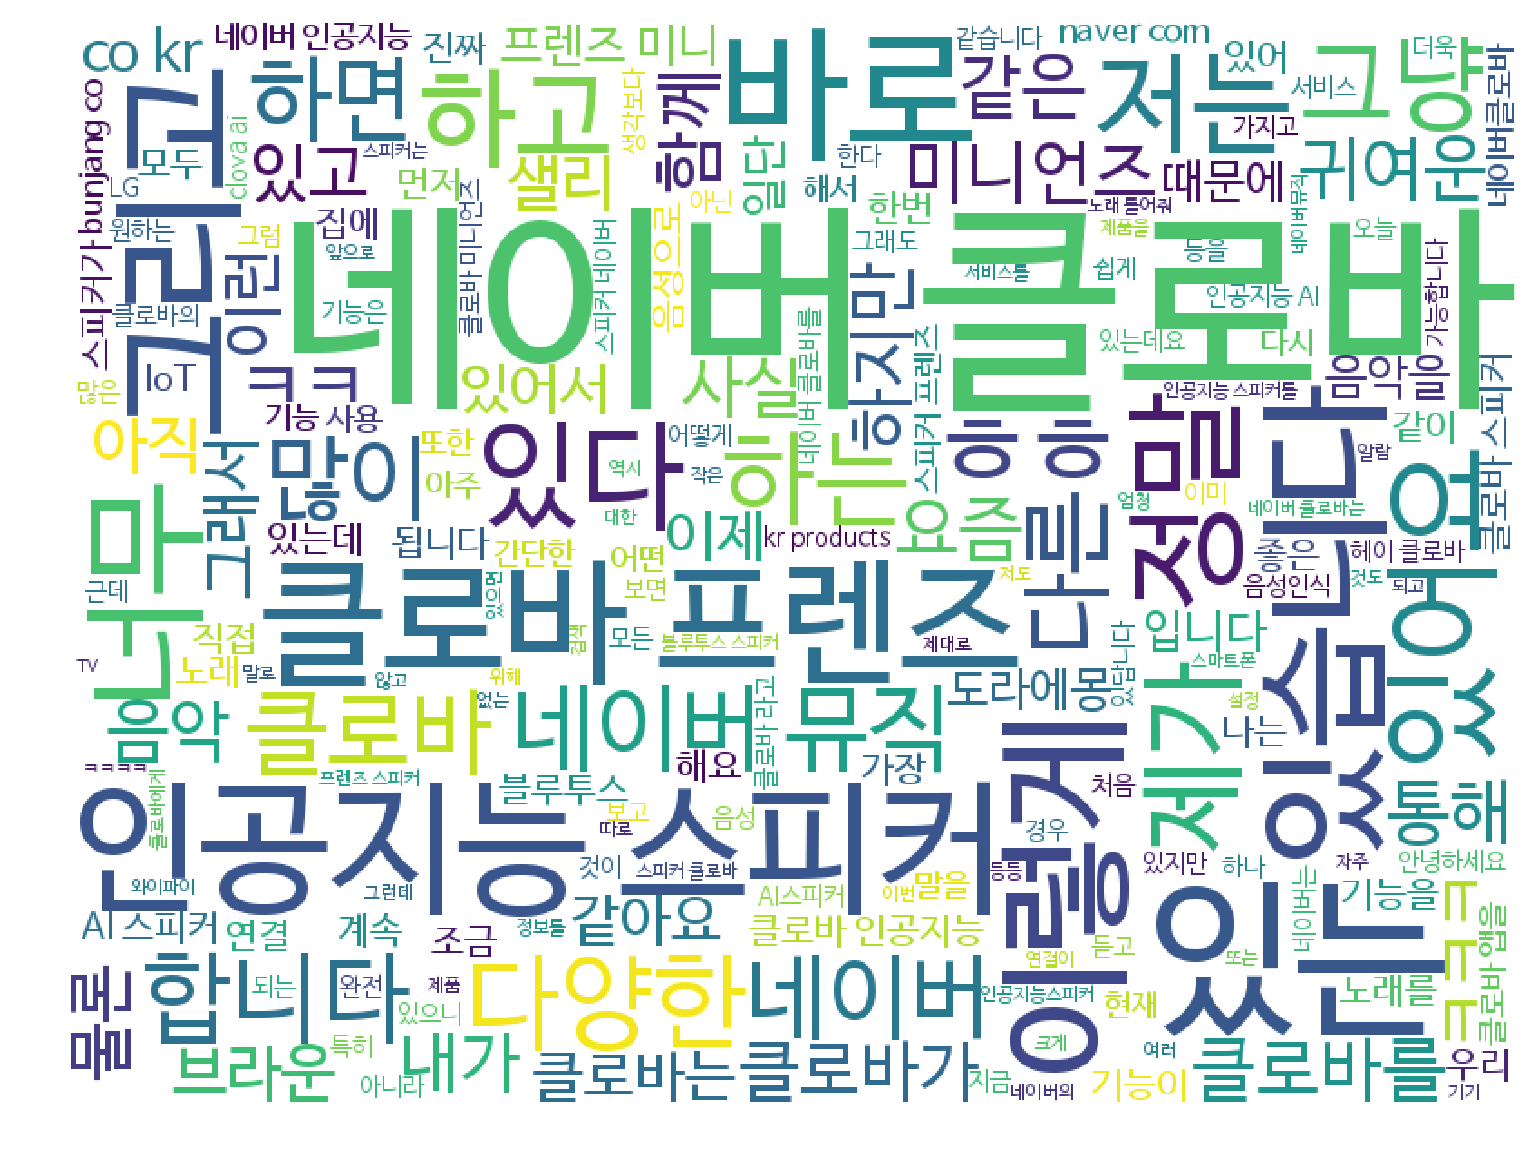

CPU times: user 3.74 s, sys: 421 ms, total: 4.16 s
Wall time: 4.22 s


In [103]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences))

In [104]:
s = """단독_보조금
청원
모식도
이
있
하
것
들
그
되
수
이
보
않
없
나
사람
주
아니
등
같
우리
때
년
가
한
지
대하
오
말
일
그렇
위하
때문
그것
두
말하
알
그러나
받
못하
일
그런
또
문제
더
사회
많
그리고
좋
크
따르
중
나오
가지
씨
시키
만들
지금
생각하
그러
속
하나
집
살
모르
적
월
데
자신
안
어떤
내
내
경우
명
생각
시간
그녀
다시
이런
앞
보이
번
나
다른
어떻
여자
개
전
들
사실
이렇
점
싶
말
정도
좀
원
잘
통하
소리
놓
동안
을
다음
연도
이상
위
아래
간
대
각종
후
반면
대부분
회
년대
조
포함
차
산하
바
이내
뿐
급
별지
량
초기
미만
관련
형
위주
외
한편
최대한
그동안
호
이후
과
당초
아래
실
앞으로
본래
이전
형
양
항
타
편
내외
카
마
개월
동
단
그중
예
자
곳
관련
르
다
척
분
선
칙
단
장
밖
유
이외
국
경
미
만
건
일부
업
직
그간
기
이하
이래
력
증
붙임
개월
기타
약간
향후
만큼
화
기존
가칭
보임
정
포괄
나머지
여명
실
올해
전년
생수
여타
최근
다수
추후
에
대한
통해
등에
개소
소
배
현
으
로
종
각각"""



In [98]:
stopwords_kr = s.split('\n')

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = stopwords_kr, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

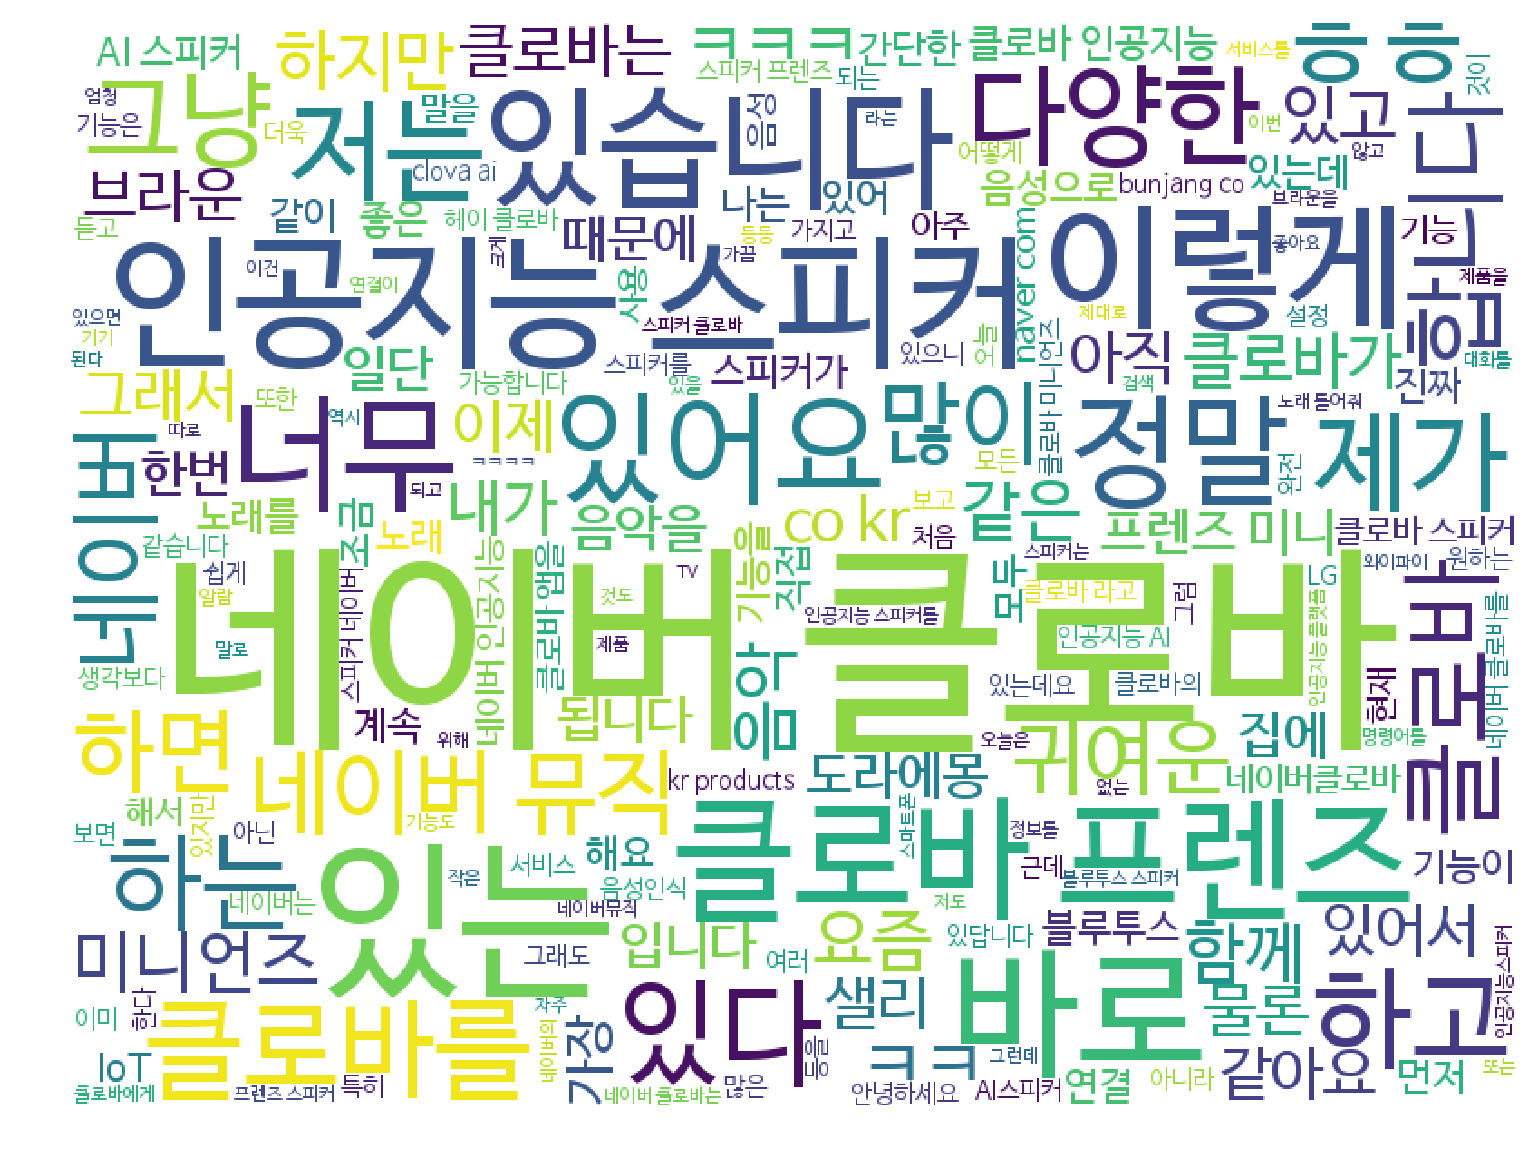

CPU times: user 3.55 s, sys: 400 ms, total: 3.95 s
Wall time: 4 s


In [100]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences))

In [89]:
from soynlp.noun import LRNounExtractor

In [90]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (16329, 10178) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 2874 nouns are extracted
CPU times: user 3.66 s, sys: 48 ms, total: 3.71 s
Wall time: 3.77 s


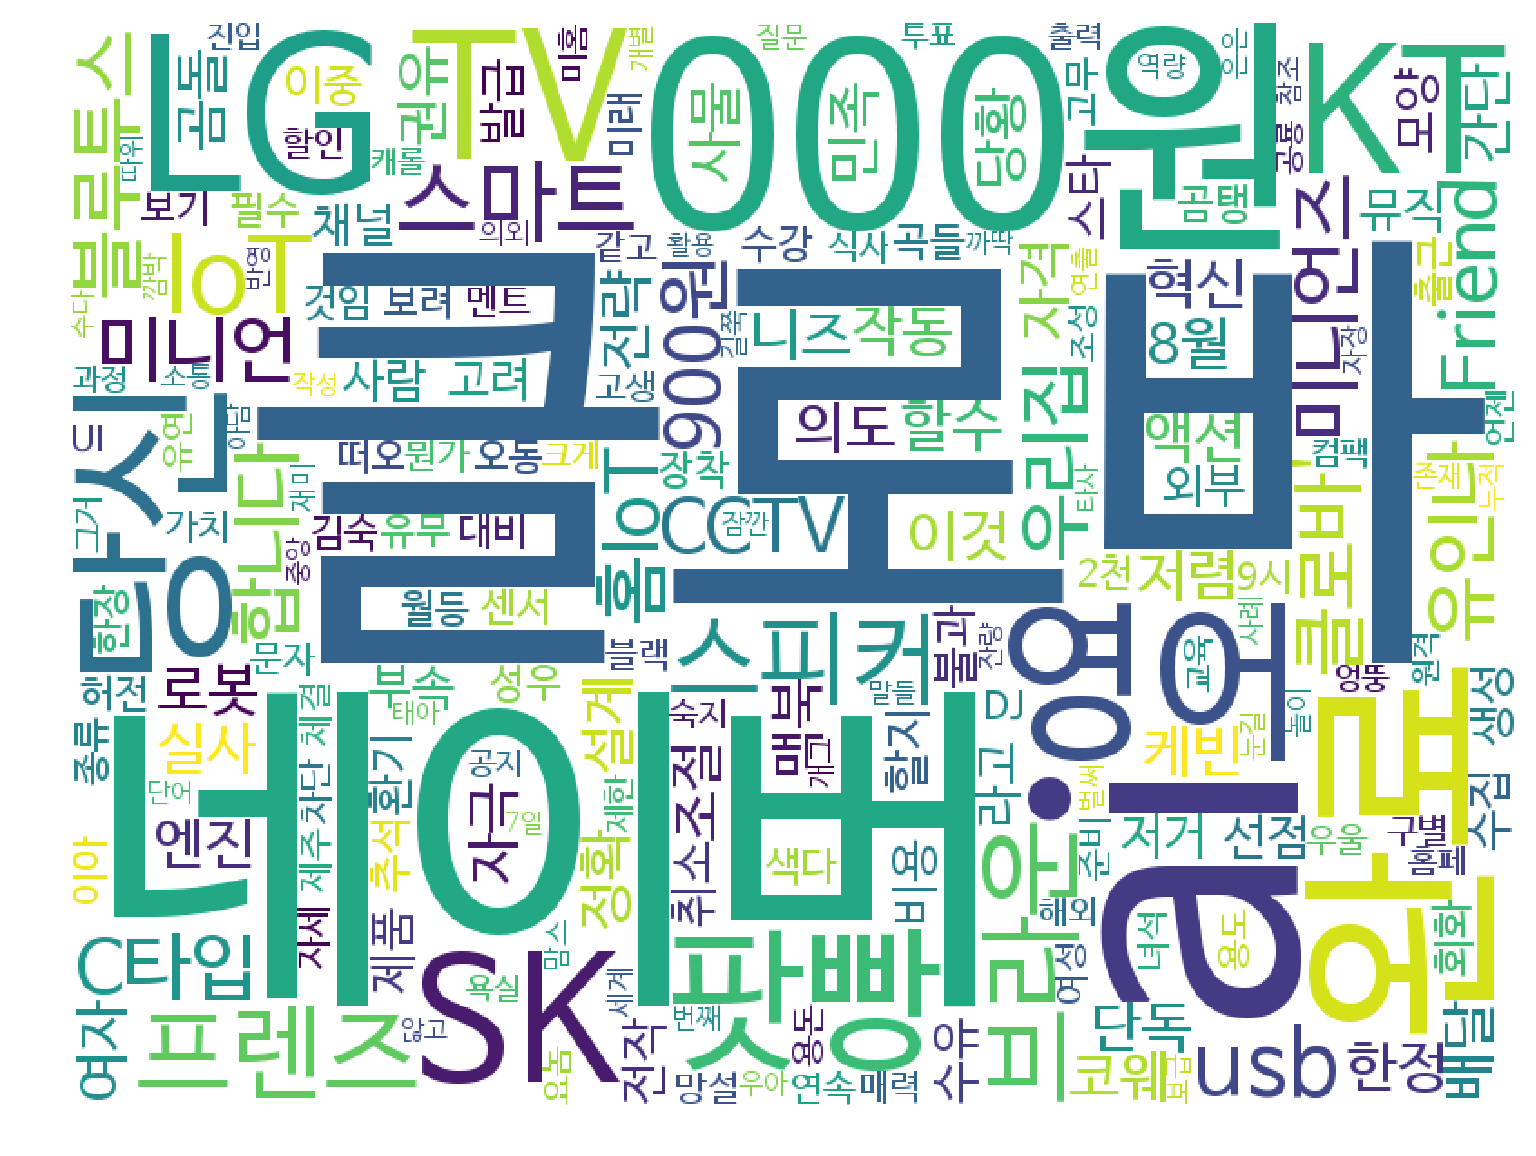

CPU times: user 1.72 s, sys: 303 ms, total: 2.03 s
Wall time: 2.05 s


In [91]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))

<br/><br/>
### 6. 벡터화 된 단어를 통해 단어 유사도 확인

In [117]:
model.wv['미니언즈']

array([ 7.5395077e-01, -6.4264077e-01,  3.8922083e-01,  1.2898961e+00,
        2.3315701e+00, -1.2604942e+00, -1.6725634e+00,  6.3612795e-01,
       -1.8114038e-01, -1.5641915e+00, -8.7690914e-01,  1.6561799e+00,
       -1.4123935e-01,  6.1595481e-02,  3.2809025e-01, -1.0843637e+00,
       -5.9709179e-01,  1.5942265e+00, -3.5184431e+00,  1.2788739e+00,
        1.2225281e+00, -5.7224119e-01,  1.2119225e+00, -9.3386275e-01,
       -1.0067391e+00,  7.3016214e-01,  9.0350485e-01,  2.8735831e-01,
       -8.2794899e-01,  2.0719061e+00,  1.9442645e+00, -5.3487480e-01,
        1.2035562e+00, -4.2685479e-01, -6.8014169e-01, -1.3543530e+00,
        1.2217187e+00, -2.9281795e-01,  1.5086523e+00,  1.6509728e+00,
        1.3643340e+00, -1.6902074e-01, -2.8216977e+00,  9.8862797e-01,
        1.1567391e+00, -2.4886549e-01,  9.4987804e-01,  1.0573679e+00,
        3.7648022e-01,  1.9728791e+00, -3.8238350e-01, -8.6513251e-01,
       -5.6945544e-01,  2.1117191e+00,  3.8265496e-01, -1.0333212e-01,
      

In [118]:
model.wv.most_similar('미니언즈')

2019-04-08 02:44:45,906 : INFO : precomputing L2-norms of word weight vectors


[('브라운', 0.9996299743652344),
 ('출시된', 0.9992212057113647),
 ('리뷰', 0.9991152286529541),
 ('사용법', 0.9990168809890747),
 ('인데요', 0.998836874961853),
 ('라인', 0.9987369179725647),
 ('프렌즈미니', 0.9986726641654968),
 ('에디션을', 0.9986169338226318),
 ('사용기', 0.9985992908477783),
 ('구입한', 0.9985473155975342)]

In [121]:
model.wv.most_similar('브라운')

[('미니언즈', 0.9996299147605896),
 ('출시된', 0.9993929266929626),
 ('리뷰', 0.9993164539337158),
 ('프렌즈미니', 0.9992117881774902),
 ('인데요', 0.9991536140441895),
 ('사용법', 0.999093770980835),
 ('사용기', 0.99898761510849),
 ('Brown', 0.9989801645278931),
 ('NUGU', 0.9988431334495544),
 ('간단', 0.9986515045166016)]

In [124]:
model.wv.most_similar('클로바')

[('사용법은', 0.9973302483558655),
 ('다운받아', 0.996956467628479),
 ('스피커와', 0.9967253804206848),
 ('뮤직', 0.9967144131660461),
 ('기가지니', 0.9965052604675293),
 ('라인', 0.9964869022369385),
 ('플러스', 0.9964743852615356),
 ('애플리케이션', 0.9962530136108398),
 ('CLOVA', 0.9962465167045593),
 ('미니언즈', 0.99624103307724)]

In [129]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('네이버 클로바 카카오 브라운 미니언즈'.split())

/Users/Taewoo/anaconda2/envs/python36/lib/python3.6/site-packages/gensim/models/keyedvectors.py:858: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'카카오'

In [130]:
model.wv.most_similar(positive=['네이버', '클로바'], negative=['카카오'])

[('프렌즈와', 0.996155858039856),
 ('프렌즈는', 0.9954805374145508),
 ('프렌즈를', 0.9946804046630859),
 ('구매하면', 0.9944949746131897),
 ('프렌즈', 0.9939827919006348),
 ('라인의', 0.9936071634292603),
 ('인공지능', 0.9934582710266113),
 ('Minions', 0.9934529066085815),
 ('최초', 0.9934162497520447),
 ('스피커인', 0.9934141039848328)]

In [135]:
model.wv.similarity('네이버', '애기')

0.7946536

In [134]:
model.wv.similarity('네이버', '블루투스')

0.9754766

In [136]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '1minwords'
model = g.Doc2Vec.load(model_name)

2019-04-08 02:52:18,128 : INFO : loading Doc2Vec object from 1minwords
2019-04-08 02:52:18,758 : INFO : loading wv recursively from 1minwords.wv.* with mmap=None
2019-04-08 02:52:18,759 : INFO : setting ignored attribute vectors_norm to None
2019-04-08 02:52:18,760 : INFO : loading vocabulary recursively from 1minwords.vocabulary.* with mmap=None
2019-04-08 02:52:18,761 : INFO : loading trainables recursively from 1minwords.trainables.* with mmap=None
2019-04-08 02:52:18,762 : INFO : setting ignored attribute cum_table to None
2019-04-08 02:52:18,763 : INFO : loaded 1minwords


In [137]:
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])

/Users/Taewoo/anaconda2/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


Feature의 길이 64787
[ 0.00442652  0.00204133  0.0033918   0.00107167  0.00175426 -0.00328307
 -0.00382379  0.00105203 -0.00259088  0.00352948]


In [138]:
df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df.shape

(150, 2)

In [139]:
df.head(20)

,x,y
애기들이,-10.118915,10.782429
좋아하는,6.673091,-3.594283
ai,5.351002,-4.272414
스피커,11.523995,-6.499370
네이버클로바,6.609985,-5.180055
작년부터,-4.860888,5.275774
tv,4.112491,-1.826380
에,6.598351,-4.461707
인공지능,11.534762,-6.496056
스피커가,7.973190,-6.076307


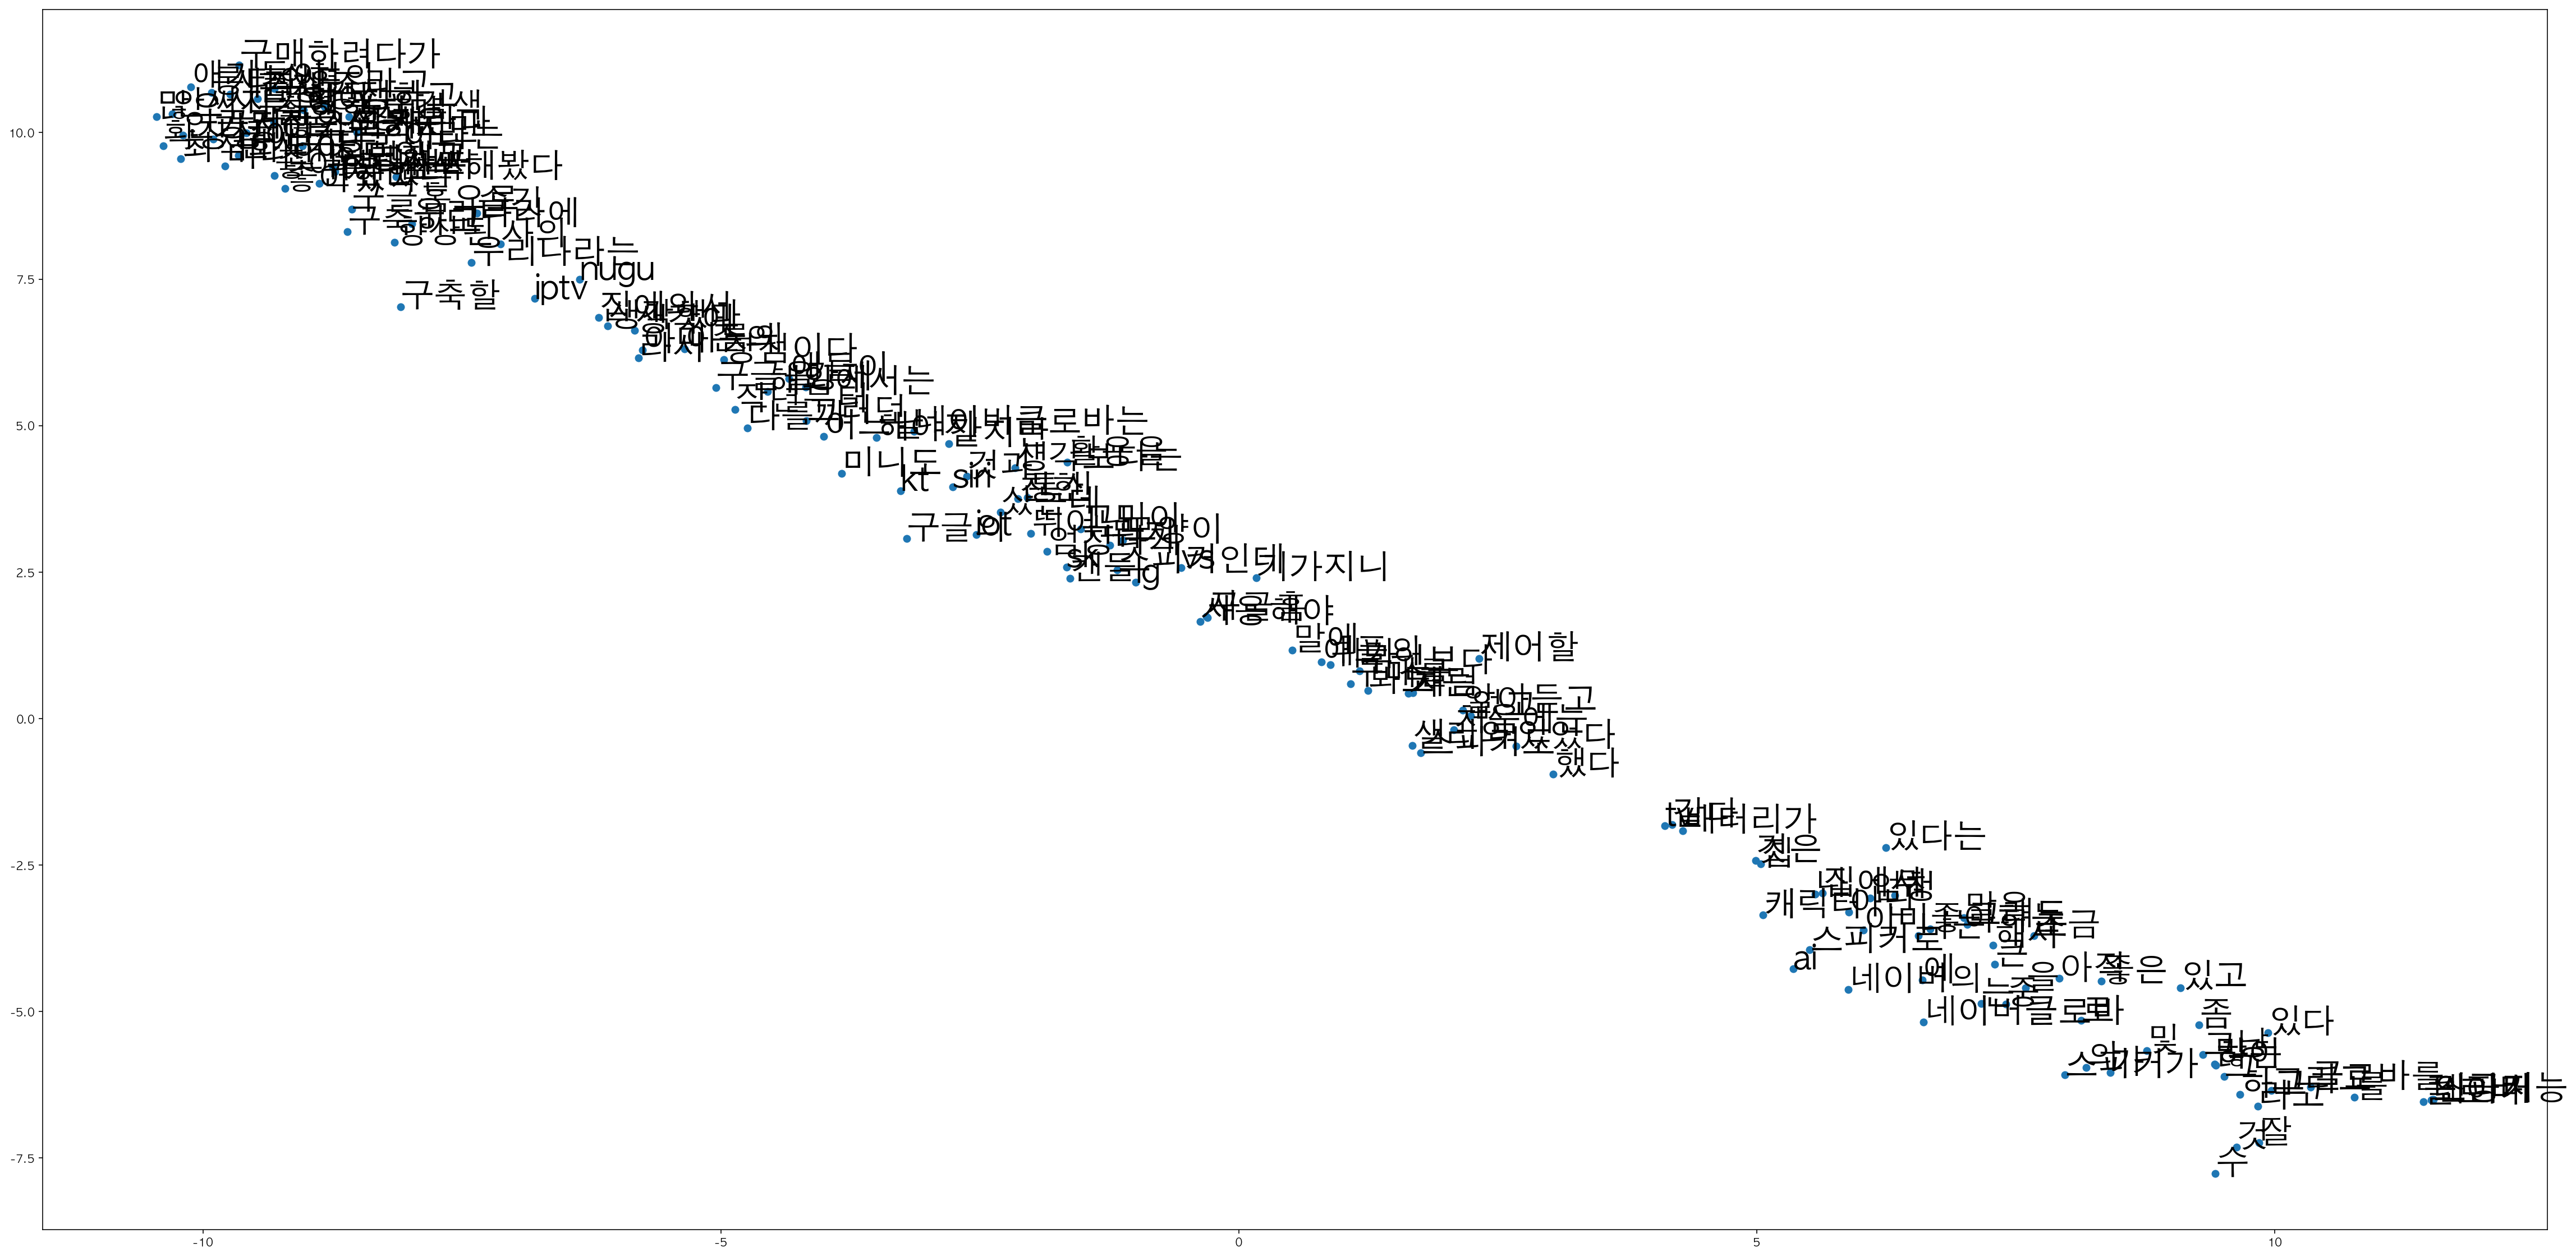

In [140]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()